## Model Evaluation
See [sklearn documentation](http://scikit-learn.org/stable/modules/model_evaluation.html)

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# read data into df
df = pd.read_csv("./data/iris-with-header.tsv", sep='\t')

# read features into X, labels into y
X = df.iloc[:, 2:4].values #X = features from column 2 to 3
y = df.iloc[:, -1].values #y = label

# convert text-based label to numerical label
#class_le = LabelEncoder()
#y = class_le.fit_transform(y) # y can now be used as labels
#print(class_le.classes_)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# train a knn
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2, weights='uniform')
iris_knn = knn.fit(X_train, y_train) # iris_knn is the model/classifier
y_pred = iris_knn.predict(X_test)

## Model Selection 1 of 2: Holdout cross-validation

**Training set**: fit different models

**validation set**: performance on validation set to guide model selection

**Test set**: to obtain less biased estimate of the model's ability to generalise to unseen data

Disadvantages: sensitive to how those data sets are divided. See ***k*-fold cross-validation**

**How:**
- repeat model fitting and evaluation with validation set for *n* times. 

See figure [ref]

## Model Selection 2 of 2: *k*-fold cross-validation

Randomly split data into *k* folds **without** replacement. 

**training set**: *k-1* folds
**test set**: 1 fold

**How**: 
- Repeat training for *k* times, test on the same **test set** -> *k* models, *k* performance estimates
- Find optimum hyperparameters' values
- Retrain with the complete **training set**, test with **test set**

See figure [ref]


## Confusion Matrix

Ref:http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 

In [2]:
from sklearn.metrics import confusion_matrix

In [14]:
cm_array = confusion_matrix(y_test, y_pred)

In [15]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

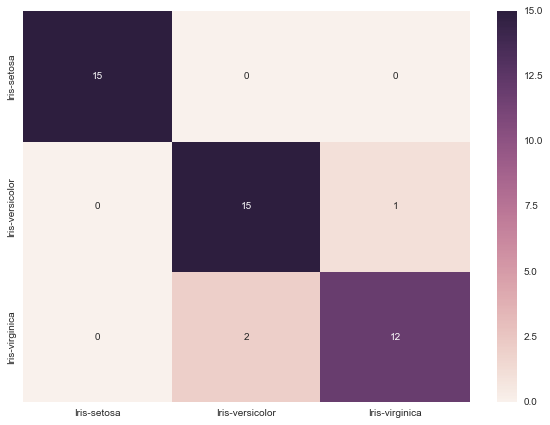

In [17]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm_array, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## `seaborn` colour palette
ref: more [colour palette](http://seaborn.pydata.org/tutorial/color_palettes.html)

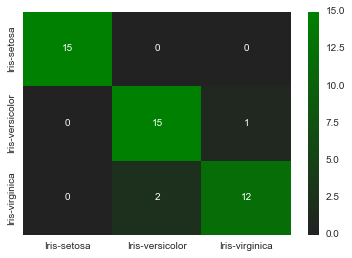

In [28]:
pal = sn.dark_palette("green", as_cmap=True)
sn.heatmap(df_cm, annot=True, cmap=pal)